In [1]:
from mcm import EcModel
reference= 'eclogitization_hacker2015_md_xenolith'

In [2]:
# Perple_X output...
''' Stixrude 2021

Stable phases at:
                             T(K)     =  1273.00
                             P(bar)   =  5000.00

Phase Compositions (molar  proportions):
                   wt %      vol %     mol %     mol        NA2O     MGO      AL2O3    SIO2     CAO      FEO
 Pl                55.60     61.47     50.34    0.201      0.20011  0.00000  0.79989  2.40023  0.59977  0.00000
 Cpx               14.70     13.10     16.10    0.643E-01  0.02656  0.67820  0.03646  1.99010  0.90294  0.30271
 Opx               29.20     24.85     31.52    0.126      0.00000  1.09205  0.02807  1.97193  0.03959  0.84029
 qtz                0.50      0.58      2.04    0.816E-02  0.00000  0.00000  0.00000  1.00000  0.00000  0.00000

Phase speciation (molar proportions):

 Pl                ab: 0.40023, an: 0.59977
 Cpx               jd: 0.05313, di: 0.59033, hed: 0.30271, cen: 0.04393, cts: 0.00990
 Opx               odi: 0.03959, en: 0.51220, fs: 0.42014, ts: 0.02807

 
'''


phases = [
    'Clinopyroxene',
    'Orthopyroxene',
    'Quartz',
    'Feldspar', 
    'Garnet', 
    'Kyanite',
]

ems = [
    'Diopside', 'Hedenbergite', 'Clinoenstatite', 'CaTschermaks', 'Jadeite',
    'Enstatite', 'Ferrosilite', 'MgTschermaks', 'OrthoDiopside',
    'Quartz',
    'Anorthite','Albite',
    'Pyrope', 'Almandine', 'Grossular', 'MgMajorite', 'NaMajorite',
    'Kyanite'
]

# mass fractions of the phases
## Grt-Opx-Cpx granulite
## given as volume fractions
phii0 = [
    0.1310, # cpx
    0.2485, # opx
    0.00580, # quartz
    0.6147, # plag
    0.0, # garnet
    0.0, # kyanite
 ]

mi0 = [
    0.1470,
    0.2920,
    0.0050,
    0.5560,
    0.0,
    0.0
]

Xik0 = [
    [0.59033, 0.30271, 0.04393, 0.00990, 0.05313], # di, hed, *cEn, *cats, jd
    [0.51220, 0.42014, 0.02807, 0.03959], # en, fs, *mgts, *oDi
    [1.], # quartz
    [0.59977, 0.40023], # an, ab
    [0.39681, 0.42983, 0.17322, 0.0000, 0.0000], # py, alm, gr, *mgmaj, *namaj
    [1.], # kyanite
]

# move cEn to oEn
Xik0[1][1] += Xik0[0][2]
Xik0[0][2] = 0.0
# move oDi to di
Xik0[0][0] += Xik0[1][3]
Xik0[1][3] = 0.0

# regularize 3-component garnet
g3 = (1-(Xik0[4][0]+Xik0[4][1]+Xik0[4][2]))/3.0
Xik0[4][0] += g3
Xik0[4][1] += g3
Xik0[4][2] += g3
Xik0[4][3] = 0.0
Xik0[4][4] = 0.0


[ 0.00061776  0.00134202  0.         -0.00798539  0.05105759 -0.00432775
 -0.02214042 -0.00501416  0.          0.01936744 -0.0382881  -0.0662341
  0.00873937  0.02694667  0.02492047  0.          0.          0.01099859]


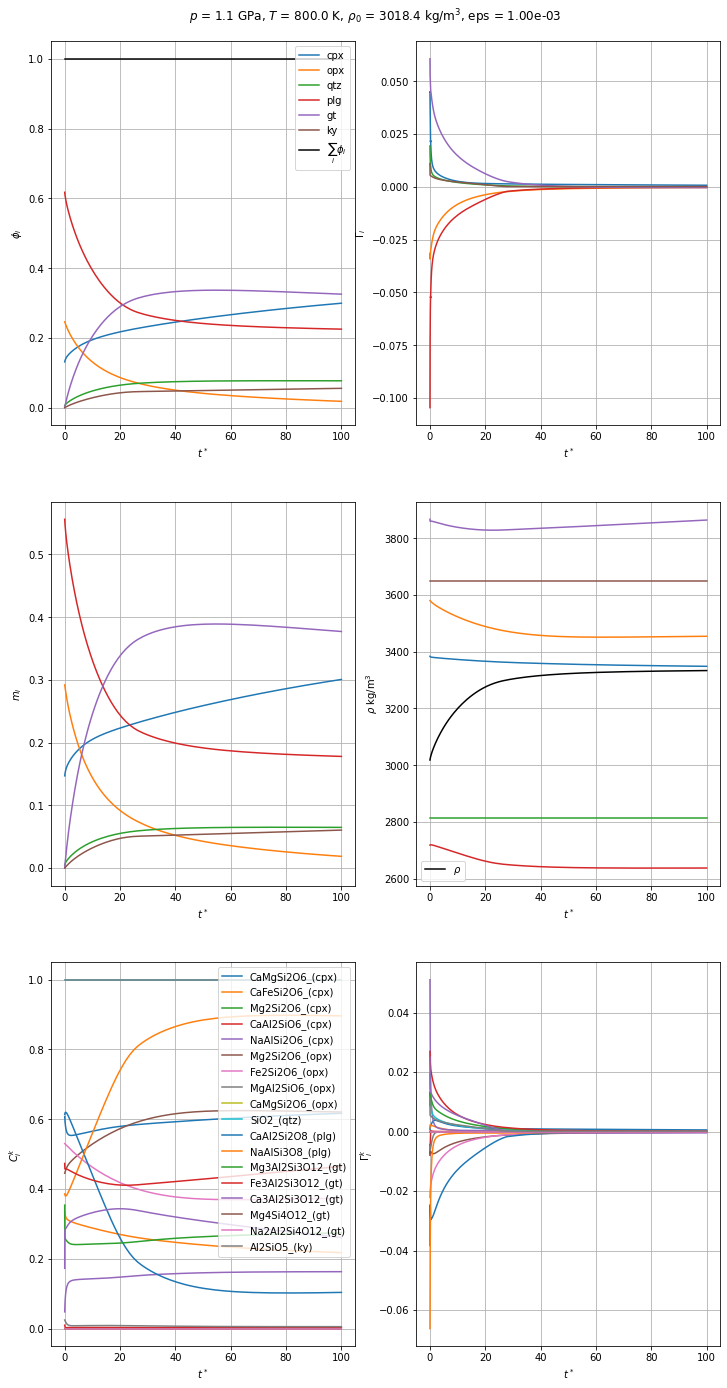

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.147000,0.292000,0.005000,0.556000,0.000000,0.000000
Wt% (final),0.300684,0.018752,0.064901,0.177997,0.377104,0.060562


(<py_eclogitization_agu5_stx21_rx.eclogitization_agu5_stx21_rx at 0x7fdf6a9cb170>,
 None,
 None)

In [3]:
model = EcModel(
    reference,
    "eclogitization_agu5_stx21_rx",
    mi0=mi0,
    Xik0=Xik0,
    P0=1.1,
    T0=800,
    nP=0,
    nT=0
)

model.run(reload=False,save=False,end_t=1e2,eps=1.e-3)


In [4]:
nu = model.rxn.nu()
print(nu)

[[[0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0], [1.0], [-1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0]], [[0.5, 0.0, 0.0, 0.0, 0.0], [-0.5, 0.0, 0.5, 0.0], [0.5], [-0.5, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0]], [[0.3333333333333333, 0.0, 0.0, 0.0, 0.0], [-0.6666666666666666, 0.0, 0.0, 0.0], [0.3333333333333333], [-0.3333333333333333, 0.0], [0.3333333333333333, 0.0, 0.0, 0.0, 0.0], [0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0], [-0.5, 0.0, 0.0, 0.0], [0.5], [-0.5, 0.0], [0.3333333333333333, 0.0, 0.16666666666666666, 0.0, 0.0], [0.0]], [[0.0, 0.3333333333333333, 0.0, 0.0, 0.0], [0.0, -0.6666666666666666, 0.0, 0.0], [0.3333333333333333], [-0.3333333333333333, 0.0], [0.0, 0.3333333333333333, 0.0, 0.0, 0.0], [0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -0.5, 0.0, 0.0], [0.5], [-0.5, 0.0], [0.0, 0.3333333333333333, 0.16666666666666666, 0.0, 0.0], [0.0]], [[0.0, 0.0, 0.0, 0.0, 0.0], [-0.5, 0.0, -0.5, 0.0], [0.0], [0.0, 0.0], [0.5, 0.0, 0.0, 0.0, 0.0], [0.0]], [[0.0, 0.0, 0.0, -0.5, 0.0], [-0.5, 0.0, 0.0, 

[-3.67804610e-06  0.00000000e+00  0.00000000e+00 -3.96944631e-04
 -4.86444692e-05  3.41014811e-06  0.00000000e+00 -3.43685616e-06
  0.00000000e+00 -1.24822373e-04  5.11012534e-04  6.31036936e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00]


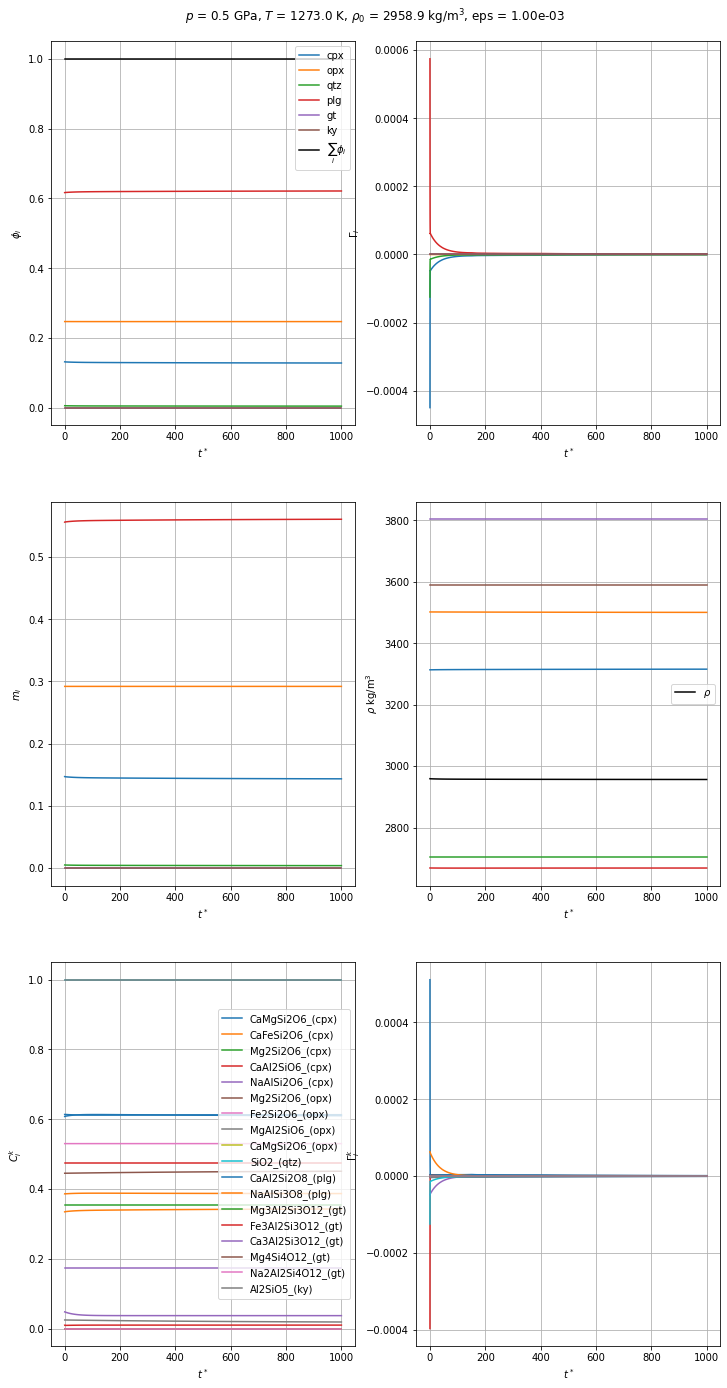

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.147000,0.292000,0.005000,0.556000,0.0,0.0
Wt% (final),0.143464,0.291987,0.003984,0.560565,0.0,0.0


: 

: 

In [5]:
model = EcModel(
    reference,
    "eclogitization_agu5_stx21_rx",
    domain="profile",
    mi0=mi0,
    Xik0=Xik0,
    P0=0.5,
    T0=1273,
    Pmin=0.5,
    Pmax=2.5,
    Tmin=1273,
    Tmax=773,
    nP=5,
    nT=5
)

model.run(reload=False,save=False,end_t=1e3,eps=1.e-3)

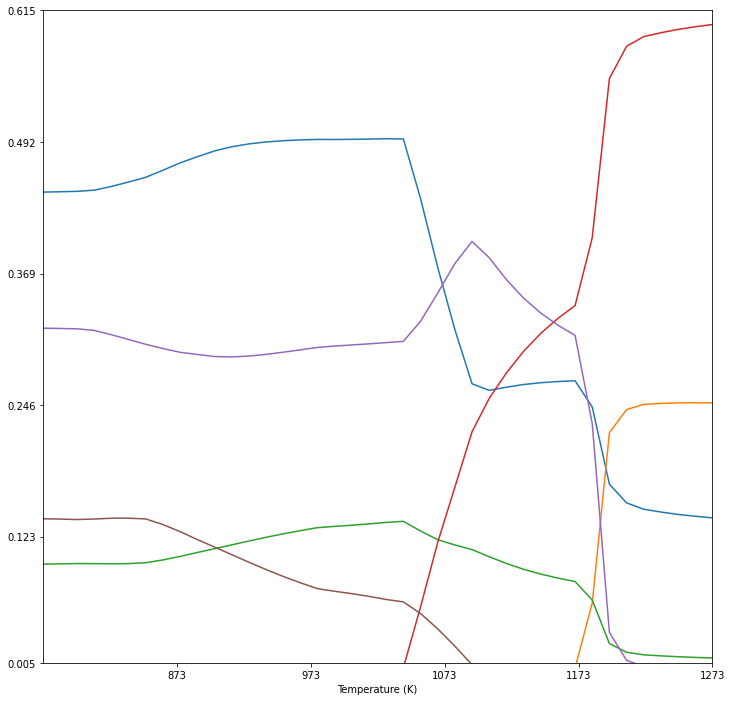

In [ ]:
import matplotlib.pyplot as plt
model.bdfdiag.plot_modes_of_all_phases()
plt.ylim([0.005, 0.615])
plt.xlim([773,1273])
plt.xticks([873, 973, 1073, 1173, 1273])
plt.yticks([0.005,0.123,0.246,0.369,0.492,0.615])
plt.show()